In [96]:
import pandas as pd
import seaborn as sns

## Data cleaning

### Data import

In [97]:
url = r"..\data\raw\clean_house.csv"
house = pd.read_csv(url, sep=",")

In [98]:
house.head(3)

,property_id,locality_name,postal_code,latitude,longitude,property_type,property_subtype,price,type_of_sale,number_of_rooms,...,terrace,terrace_area,garden,garden_area,surface_of_good,number_of_facades,swimming_pool,state_of_building,main_city,province
0,11157483,ronse,9600,50.741809,3.607601,HOUSE,HOUSE,245000.0,BUY_REGULAR,NaN,...,1.0,13.0,1.0,161.0,250.0,2.0,0.0,GOOD,ronse,oost-vlaanderen
1,11156843,merelbeke,9820,51.019250,3.760957,HOUSE,HOUSE,315000.0,BUY_REGULAR,NaN,...,1.0,23.0,NaN,NaN,77.0,2.0,NaN,GOOD,merelbeke,oost-vlaanderen
2,11161362,forêt,4870,50.563966,5.675489,HOUSE,HOUSE,325000.0,BUY_REGULAR,NaN,...,1.0,16.0,1.0,420.0,572.0,3.0,NaN,AS_NEW,trooz,luik


In [99]:
print("There are {} rows of data".format(len(statehouse)))

There are 4154 rows of data


Subsetting data to the state of the building

In [100]:
statehouse = house[(house["province"] == "limburg") | (house["province"] == "west-vlaanderen")]
statehouse.isnull().sum()

property_id                  0
locality_name                0
postal_code                  0
latitude                   184
longitude                  184
property_type                0
property_subtype             0
price                        0
type_of_sale                 0
number_of_rooms            771
living_area                  0
kitchen_type              1272
fully_equipped_kitchen     880
furnished                 1828
open_fire                    0
terrace                   1342
terrace_area              1963
garden                    1715
garden_area               1805
surface_of_good              0
number_of_facades          693
swimming_pool             1814
state_of_building          487
main_city                    0
province                     0
dtype: int64

Replacing value in garden with numeric value

In [101]:
condition_1 = (statehouse['garden'] == 1.0) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_1, 'garden_area'] = statehouse['garden_area'].median()
condition_2 = (statehouse['garden'] == 0) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_2, 'garden_area'] = 0
condition_3 = (statehouse['garden'].isnull()) & (statehouse['garden_area'].isnull())
statehouse.loc[condition_3, 'garden_area'] = -1

Replacing values in terrace with numeric values

In [102]:
condition_1 = (statehouse['terrace'] == 1.0) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_1, 'terrace_area'] = statehouse['terrace_area'].median()
condition_2 = (statehouse['terrace'] == 0) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_2, 'terrace_area'] = 0
condition_3 = (statehouse['terrace'].isnull()) & (statehouse['terrace_area'].isnull())
statehouse.loc[condition_3, 'terrace_area'] = -1

Replacing values in number_of_rooms with the median

In [103]:
statehouse["number_of_rooms"].mean(), statehouse["number_of_rooms"].median()
condition_1 = (statehouse["number_of_rooms"].isnull())
statehouse.loc[condition_1, "number_of_rooms"] = statehouse["number_of_rooms"].median()

Replacing values in number of facades with mean

In [104]:
statehouse["number_of_facades"].mean(), statehouse["number_of_facades"].median()
condition_1 = (statehouse["number_of_facades"].isnull())
statehouse.loc[condition_1, "number_of_facades"] = statehouse["number_of_facades"].median()

The cleaned dataframe

In [105]:
corrhouse = statehouse[["price", "number_of_rooms", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]
print(round(corrhouse["number_of_facades"].mean()))
corrhouse.isnull().sum()

3


price                0
number_of_rooms      0
terrace_area         0
garden_area          0
surface_of_good      0
number_of_facades    0
dtype: int64

The correlation in the dataframe in a heatmap

<Axes: >

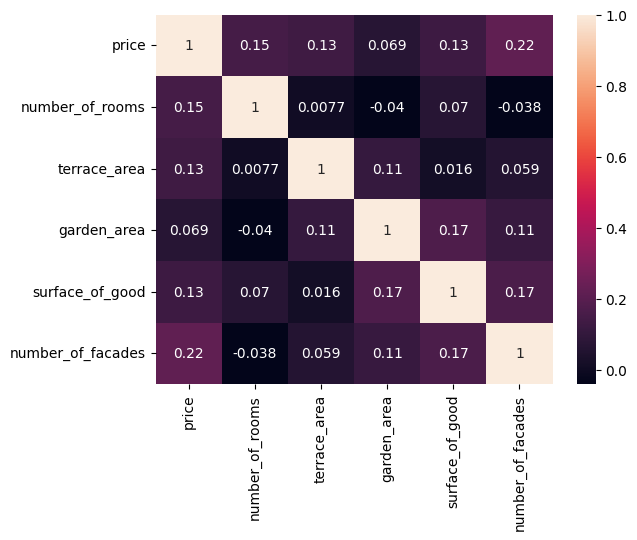

In [106]:
sns.heatmap(corrhouse.corr(), annot=True)